In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd 'drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [0]:
df=pd.read_csv('mainapp_person.csv',index_col='id')

In [6]:
df.head(
  
)

,kod_pocztowy,wiek,plec,student,odpornosc_stresowa,rozproszenie,wynik1,wynik2,wynikSAR,wiedza_o_nomofobii,podejrzenie_nomofobii,cukrzyca,choroby_ukladu_krazenia,przewlekle_choroby_ukladu_oddechowego,otlosc,nowotwory,osteoporoza,choroby_autoimmunologiczne,padaczka,przewlekla_choroba_nerek,inne,Alkohol,Wyroby,Hazard,Praca,Narkotyki,Leki,Internet,Gry,Pornografia,Seks,Smartfon,Inne_uzaleznienia,t_rodzaj,t_przywiazanie,t_czas_dziennie,t_najczesciej,t_czas_najczesciej,t_cena,t_przekatna
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,21-444,12,K,True,3,2,-1,-1,0,nie,nie,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,True,True,False,True,klasyczny,zazwyczaj mam go przy sobie chociaż czasami wy...,0.0,none,0.0,none,0.0
9,05-300,21,K,False,2,4,1,-1,1,nie,nie,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,smartfon,"używam sporadycznie, ale zawsze zabieram go ze...",2.5,Do obserwacji mediów społecznościowych,1.5,średnia,6.5
10,21-444,22,M,True,4,1,0,-1,1,nie,nie,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,klasyczny,używam sporadycznie i noszę go poza domem bard...,0.0,none,0.0,none,0.0
11,21-444,23,M,True,5,1,3,-1,0,nie,nie,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,brak,none,0.0,none,0.0,none,0.0
12,05-300,22,M,True,4,2,2,0,1,tak,nie,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,smartfon,spędzam z nim większość dnia jednak czasami gd...,1.5,Do grania w gry,1.0,średnia,6.0


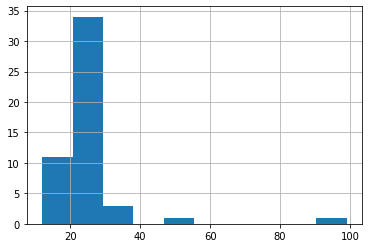

In [7]:
df['wiek'].hist()

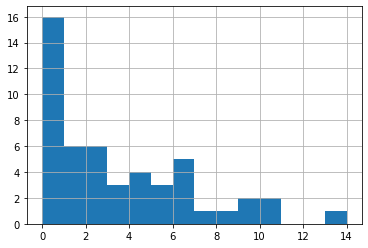

In [8]:
df['t_czas_dziennie'].hist(bins=14)

In [0]:
df['suma'] = df.wynik1+df.wynik2+df.wynikSAR

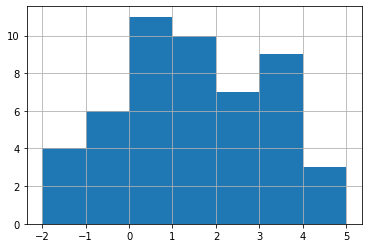

In [10]:
df['suma'].hist(bins=7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


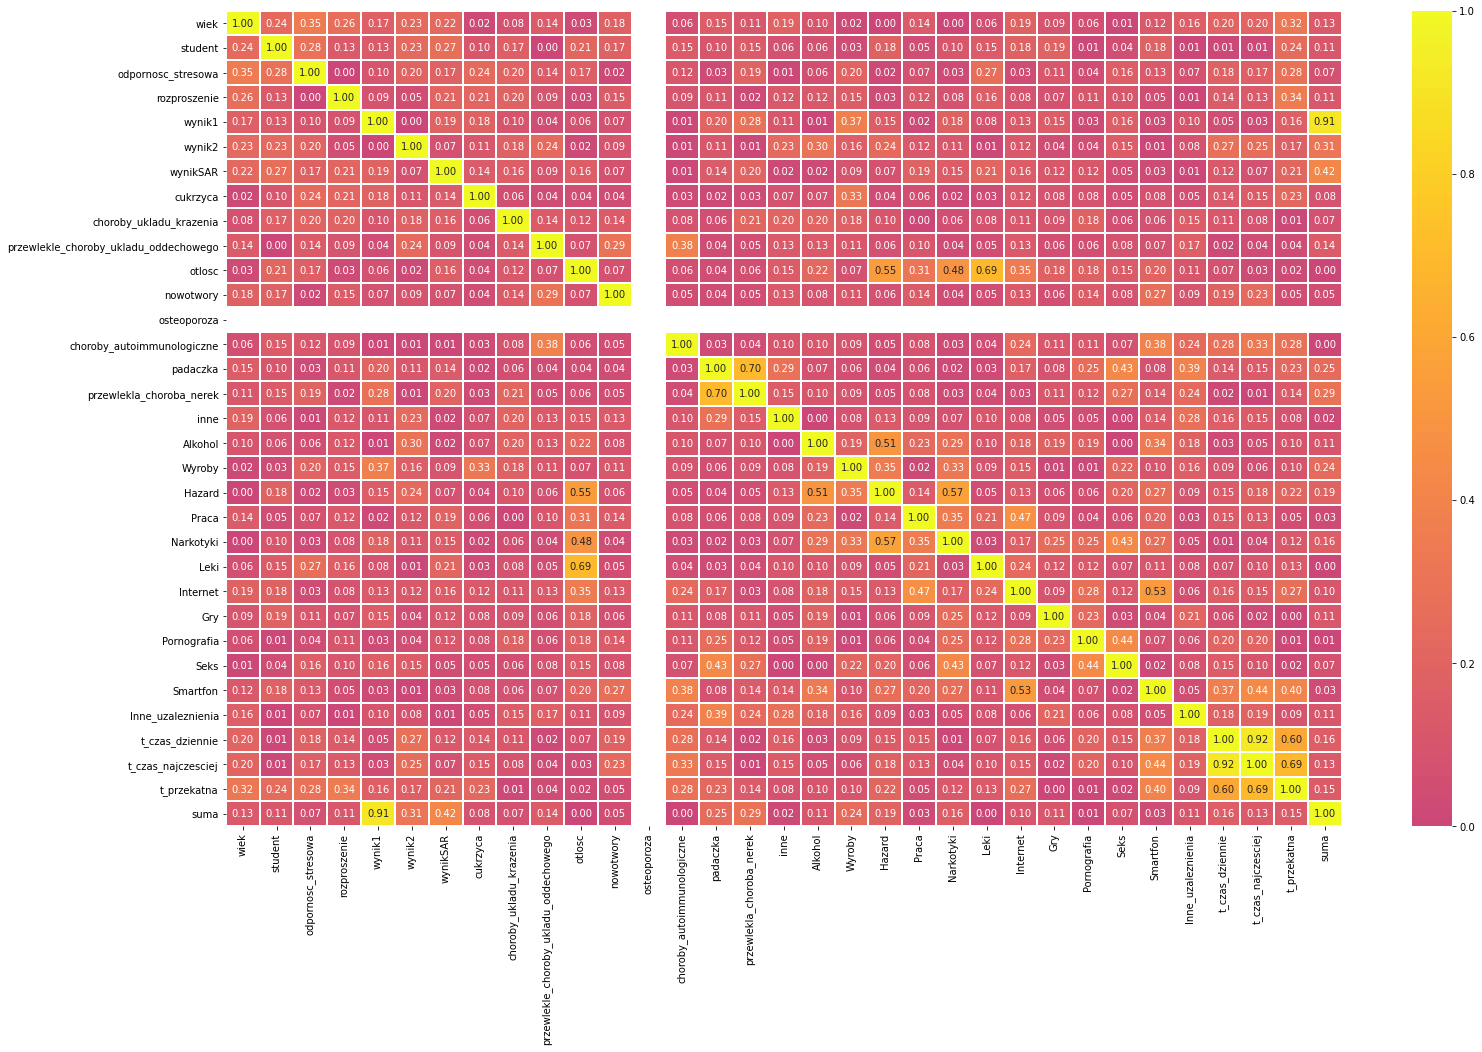

In [11]:
import seaborn as sns
corr=abs(df.corr())
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr,  cmap='plasma', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans

df = df.fillna(0)

categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()
dfc=df.copy()

# Apply LabelEncoder to categorical columns
dfc[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(dfc[categorical_columns].head())

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


pipeline.fit(dfc)

# Calculate the cluster labels: labels
labels = pipeline.predict(dfc)

# Create a DataFrame with labels and species as columns: df
df2 = pd.DataFrame(data={'wzorce':labels},index=df.index)

# Create crosstab: ct
#ct = pd.crosstab(df2['wzorce'],df2['ankietowani'])

# Display ct
#print(ct)

   kod_pocztowy plec  ...                           t_najczesciej   t_cena
id                    ...                                                 
8        21-444    K  ...                                    none     none
9        05-300    K  ...  Do obserwacji mediów społecznościowych  średnia
10       21-444    M  ...                                    none     none
11       21-444    M  ...                                    none     none
12       05-300    M  ...                         Do grania w gry  średnia

[5 rows x 8 columns]
    kod_pocztowy  plec  ...  t_najczesciej  t_cena
id                      ...                       
8             10     0  ...              6       1
9              2     0  ...              2       3
10            10     1  ...              6       1
11            10     1  ...              6       1
12             2     1  ...              0       3

[5 rows x 8 columns]


In [0]:
df2=pd.concat([df,df2],axis=1)


In [45]:
df2.head()

,kod_pocztowy,wiek,plec,student,odpornosc_stresowa,rozproszenie,wynik1,wynik2,wynikSAR,wiedza_o_nomofobii,podejrzenie_nomofobii,cukrzyca,choroby_ukladu_krazenia,przewlekle_choroby_ukladu_oddechowego,otlosc,nowotwory,osteoporoza,choroby_autoimmunologiczne,padaczka,przewlekla_choroba_nerek,inne,Alkohol,Wyroby,Hazard,Praca,Narkotyki,Leki,Internet,Gry,Pornografia,Seks,Smartfon,Inne_uzaleznienia,t_rodzaj,t_przywiazanie,t_czas_dziennie,t_najczesciej,t_czas_najczesciej,t_cena,t_przekatna,suma,wzorce
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,21-444,12,K,True,3,2,-1,-1,0,nie,nie,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,True,True,False,True,klasyczny,zazwyczaj mam go przy sobie chociaż czasami wy...,0.0,none,0.0,none,0.0,-2,1
9,05-300,21,K,False,2,4,1,-1,1,nie,nie,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,smartfon,"używam sporadycznie, ale zawsze zabieram go ze...",2.5,Do obserwacji mediów społecznościowych,1.5,średnia,6.5,1,0
10,21-444,22,M,True,4,1,0,-1,1,nie,nie,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,klasyczny,używam sporadycznie i noszę go poza domem bard...,0.0,none,0.0,none,0.0,0,2
11,21-444,23,M,True,5,1,3,-1,0,nie,nie,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,brak,none,0.0,none,0.0,none,0.0,2,2
12,05-300,22,M,True,4,2,2,0,1,tak,nie,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,smartfon,spędzam z nim większość dnia jednak czasami gd...,1.5,Do grania w gry,1.0,średnia,6.0,3,0


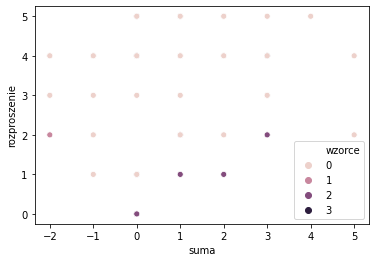

In [46]:
sns.scatterplot(x='suma',y='rozproszenie',hue='wzorce',data=df2)

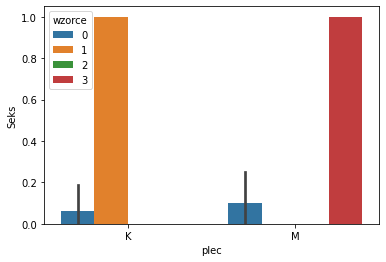

In [47]:
sns.barplot(x='plec',y='Seks',hue='wzorce',data=df2)

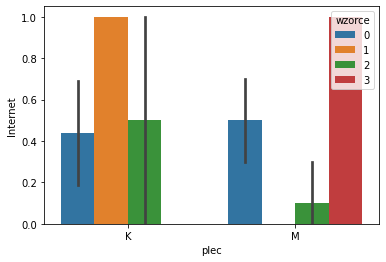

In [48]:
sns.barplot(x='plec',y='Internet',hue='wzorce',data=df2)

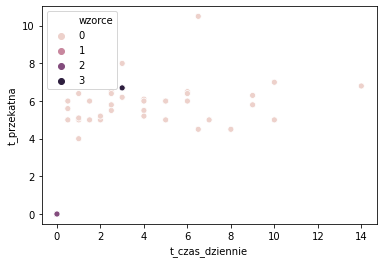

In [49]:
sns.scatterplot(x='t_czas_dziennie',y='t_przekatna',hue='wzorce',data=df2)

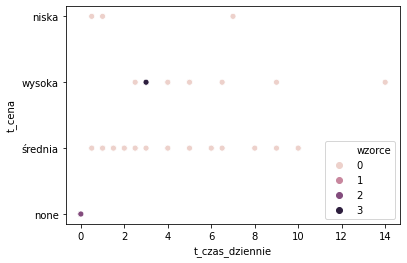

In [52]:
sns.scatterplot(x='t_czas_dziennie',y='t_cena',hue='wzorce',data=df2)

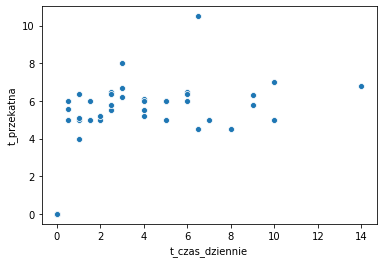

In [51]:
sns.scatterplot(x='t_czas_dziennie',y='t_przekatna',data=df2)

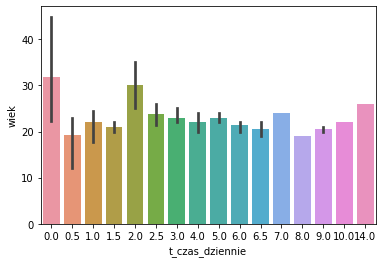

In [64]:
sns.barplot(x='t_czas_dziennie',y='wiek',data=df2)

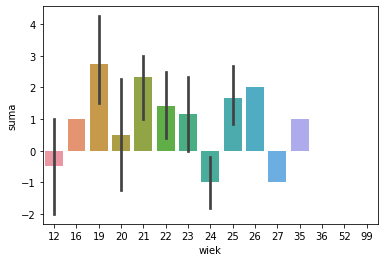

In [68]:
sns.barplot(y='suma',x='wiek',data=df2)


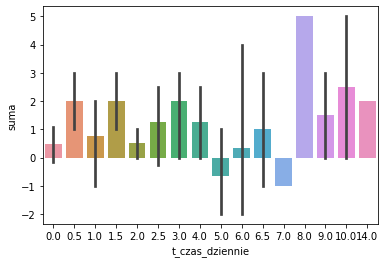

In [70]:
sns.barplot(y='suma',x='t_czas_dziennie',data=df2)

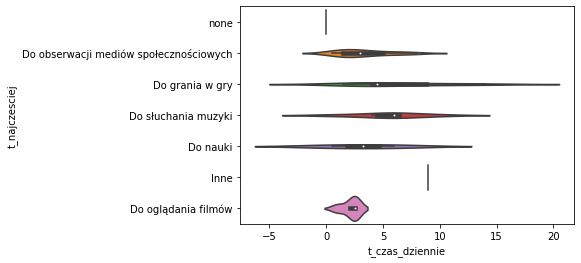

In [94]:
sns.violinplot(y='t_najczesciej',x='t_czas_dziennie',data=df2)

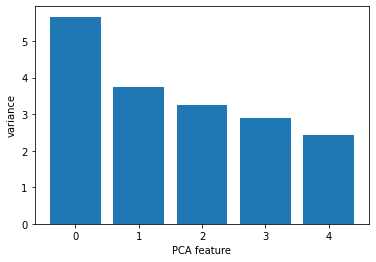

(50, 5)
(50, 41)
[0.13877152 0.0916112  0.07934176 0.07108505 0.05921238] plcaexvratio
[0.13877152 0.23038273 0.30972448 0.38080953 0.44002192] pcaexplainedvratiosum


In [83]:
from sklearn.decomposition import PCA




# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=5) #param n_components=n reduces the number of features to n with the highest varriance

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(dfc)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

pc_df = pd.DataFrame(pipeline.transform(dfc),index=df.index)
pc_df.head()
print(pc_df.shape)
print(dfc.shape)

# Create a pairplot of the principal component dataframe
#sns.pairplot(pc_df)
#plt.show()

print(pca.explained_variance_ratio_,'plcaexvratio')

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum(),'pcaexplainedvratiosum')

In [84]:
df3=pd.concat([dfc,pc_df],axis=1)
df3.head()

,kod_pocztowy,wiek,plec,student,odpornosc_stresowa,rozproszenie,wynik1,wynik2,wynikSAR,wiedza_o_nomofobii,podejrzenie_nomofobii,cukrzyca,choroby_ukladu_krazenia,przewlekle_choroby_ukladu_oddechowego,otlosc,nowotwory,osteoporoza,choroby_autoimmunologiczne,padaczka,przewlekla_choroba_nerek,inne,Alkohol,Wyroby,Hazard,Praca,Narkotyki,Leki,Internet,Gry,Pornografia,Seks,Smartfon,Inne_uzaleznienia,t_rodzaj,t_przywiazanie,t_czas_dziennie,t_najczesciej,t_czas_najczesciej,t_cena,t_przekatna,suma,0,1,2,3,4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,10,12,0,True,3,2,-1,-1,0,0,0,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,True,True,False,True,1,7,0.0,6,0.0,1,0.0,-2,2.692096,-1.437806,9.191730,-1.452854,-0.061336
9,2,21,0,False,2,4,1,-1,1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,2,6,2.5,2,1.5,3,6.5,1,-1.626244,-1.007744,1.761699,0.736651,-3.075914
10,10,22,1,True,4,1,0,-1,1,0,0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,1,4,0.0,6,0.0,1,0.0,0,2.483803,0.792040,0.497962,1.505703,1.216368
11,10,23,1,True,5,1,3,-1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,1,0.0,6,0.0,1,0.0,2,3.869072,0.406577,-0.259798,4.277870,2.278095
12,2,22,1,True,4,2,2,0,1,1,0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,2,3,1.5,0,1.0,3,6.0,3,-1.179655,1.250548,-0.689701,-0.124840,0.221196


In [72]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(dfc,labels)
print("Feature Importance:\n")
for name, importance in zip(df.columns, np.sort(dtc.feature_importances_)[::-1]):
  if importance>0.01:
    print(">>>{} -- {:.4f}".format(name, importance))
  else:
    print("<<<{} -- {:.4f}".format(name, importance))

Feature Importance:

>>>kod_pocztowy -- 0.8208
>>>wiek -- 0.0920
>>>plec -- 0.0872
<<<student -- 0.0000
<<<odpornosc_stresowa -- 0.0000
<<<rozproszenie -- 0.0000
<<<wynik1 -- 0.0000
<<<wynik2 -- 0.0000
<<<wynikSAR -- 0.0000
<<<wiedza_o_nomofobii -- 0.0000
<<<podejrzenie_nomofobii -- 0.0000
<<<cukrzyca -- 0.0000
<<<choroby_ukladu_krazenia -- 0.0000
<<<przewlekle_choroby_ukladu_oddechowego -- 0.0000
<<<otlosc -- 0.0000
<<<nowotwory -- 0.0000
<<<osteoporoza -- 0.0000
<<<choroby_autoimmunologiczne -- 0.0000
<<<padaczka -- 0.0000
<<<przewlekla_choroba_nerek -- 0.0000
<<<inne -- 0.0000
<<<Alkohol -- 0.0000
<<<Wyroby -- 0.0000
<<<Hazard -- 0.0000
<<<Praca -- 0.0000
<<<Narkotyki -- 0.0000
<<<Leki -- 0.0000
<<<Internet -- 0.0000
<<<Gry -- 0.0000
<<<Pornografia -- 0.0000
<<<Seks -- 0.0000
<<<Smartfon -- 0.0000
<<<Inne_uzaleznienia -- 0.0000
<<<t_rodzaj -- 0.0000
<<<t_przywiazanie -- 0.0000
<<<t_czas_dziennie -- 0.0000
<<<t_najczesciej -- 0.0000
<<<t_czas_najczesciej -- 0.0000
<<<t_cena -- 0.0000

In [86]:
dtc=DecisionTreeClassifier()
dtc.fit(df3,labels)
print("Feature Importance:\n")
for name, importance in zip(df3.columns, np.sort(dtc.feature_importances_)[::-1]):
  if importance>0.01:
    print(">>>{} -- {:.4f}".format(name, importance))
  else:
    print("<<<{} -- {:.4f}".format(name, importance))

Feature Importance:

>>>kod_pocztowy -- 0.8208
>>>wiek -- 0.0920
>>>plec -- 0.0872
<<<student -- 0.0000
<<<odpornosc_stresowa -- 0.0000
<<<rozproszenie -- 0.0000
<<<wynik1 -- 0.0000
<<<wynik2 -- 0.0000
<<<wynikSAR -- 0.0000
<<<wiedza_o_nomofobii -- 0.0000
<<<podejrzenie_nomofobii -- 0.0000
<<<cukrzyca -- 0.0000
<<<choroby_ukladu_krazenia -- 0.0000
<<<przewlekle_choroby_ukladu_oddechowego -- 0.0000
<<<otlosc -- 0.0000
<<<nowotwory -- 0.0000
<<<osteoporoza -- 0.0000
<<<choroby_autoimmunologiczne -- 0.0000
<<<padaczka -- 0.0000
<<<przewlekla_choroba_nerek -- 0.0000
<<<inne -- 0.0000
<<<Alkohol -- 0.0000
<<<Wyroby -- 0.0000
<<<Hazard -- 0.0000
<<<Praca -- 0.0000
<<<Narkotyki -- 0.0000
<<<Leki -- 0.0000
<<<Internet -- 0.0000
<<<Gry -- 0.0000
<<<Pornografia -- 0.0000
<<<Seks -- 0.0000
<<<Smartfon -- 0.0000
<<<Inne_uzaleznienia -- 0.0000
<<<t_rodzaj -- 0.0000
<<<t_przywiazanie -- 0.0000
<<<t_czas_dziennie -- 0.0000
<<<t_najczesciej -- 0.0000
<<<t_czas_najczesciej -- 0.0000
<<<t_cena -- 0.0000

In [73]:
dtc2=DecisionTreeClassifier()
y=dfc['suma']
x=pc_df

dtc2.fit(x,y)
print("Feature Importance:\n")
for name, importance in zip(x.columns, np.sort(dtc2.feature_importances_)[::-1]):
  if importance>0.01:
    print(">>>{} -- {:.4f}".format(name, importance))
  else:
    print("<<<{} -- {:.4f}".format(name, importance))

Feature Importance:

>>>0 -- 0.1597
>>>1 -- 0.1232
>>>2 -- 0.0939
>>>3 -- 0.0883
>>>4 -- 0.0765
>>>5 -- 0.0749
>>>6 -- 0.0673
>>>7 -- 0.0574
>>>8 -- 0.0478
>>>9 -- 0.0478
>>>10 -- 0.0398
>>>11 -- 0.0398
>>>12 -- 0.0359
>>>13 -- 0.0239
>>>14 -- 0.0239
<<<15 -- 0.0000
<<<16 -- 0.0000
<<<17 -- 0.0000
<<<18 -- 0.0000
<<<19 -- 0.0000
<<<20 -- 0.0000
<<<21 -- 0.0000
<<<22 -- 0.0000
<<<23 -- 0.0000
<<<24 -- 0.0000
<<<25 -- 0.0000
<<<26 -- 0.0000
<<<27 -- 0.0000
<<<28 -- 0.0000
<<<29 -- 0.0000
<<<30 -- 0.0000
<<<31 -- 0.0000
<<<32 -- 0.0000
<<<33 -- 0.0000
<<<34 -- 0.0000
<<<35 -- 0.0000
<<<36 -- 0.0000
<<<37 -- 0.0000
<<<38 -- 0.0000
<<<39 -- 0.0000
<<<40 -- 0.0000


In [74]:
dtc2=DecisionTreeClassifier()
y=dfc['suma']
x=dfc.drop(['suma'],axis=1)

dtc2.fit(x,y)
print("Feature Importance:\n")
for name, importance in zip(x.columns, np.sort(dtc2.feature_importances_)[::-1]):
  if importance>0.01:
    print(">>>{} -- {:.4f}".format(name, importance))
  else:
    print("<<<{} -- {:.4f}".format(name, importance))

Feature Importance:

>>>kod_pocztowy -- 0.1938
>>>wiek -- 0.1165
>>>plec -- 0.1086
>>>student -- 0.0981
>>>odpornosc_stresowa -- 0.0876
>>>rozproszenie -- 0.0650
>>>wynik1 -- 0.0598
>>>wynik2 -- 0.0452
>>>wynikSAR -- 0.0430
>>>wiedza_o_nomofobii -- 0.0425
>>>podejrzenie_nomofobii -- 0.0410
>>>cukrzyca -- 0.0398
>>>choroby_ukladu_krazenia -- 0.0353
>>>przewlekle_choroby_ukladu_oddechowego -- 0.0239
<<<otlosc -- 0.0000
<<<nowotwory -- 0.0000
<<<osteoporoza -- 0.0000
<<<choroby_autoimmunologiczne -- 0.0000
<<<padaczka -- 0.0000
<<<przewlekla_choroba_nerek -- 0.0000
<<<inne -- 0.0000
<<<Alkohol -- 0.0000
<<<Wyroby -- 0.0000
<<<Hazard -- 0.0000
<<<Praca -- 0.0000
<<<Narkotyki -- 0.0000
<<<Leki -- 0.0000
<<<Internet -- 0.0000
<<<Gry -- 0.0000
<<<Pornografia -- 0.0000
<<<Seks -- 0.0000
<<<Smartfon -- 0.0000
<<<Inne_uzaleznienia -- 0.0000
<<<t_rodzaj -- 0.0000
<<<t_przywiazanie -- 0.0000
<<<t_czas_dziennie -- 0.0000
<<<t_najczesciej -- 0.0000
<<<t_czas_najczesciej -- 0.0000
<<<t_cena -- 0.0000

In [77]:
from sklearn.tree import DecisionTreeRegressor
dtc2=DecisionTreeRegressor()
y=dfc['t_czas_dziennie']
x=dfc.drop(['t_czas_dziennie','kod_pocztowy'],axis=1)

dtc2.fit(x,y)
print("Feature Importance:\n")
for name, importance in zip(x.columns, np.sort(dtc2.feature_importances_)[::-1]):
  if importance>0.01:
    print(">>>{} -- {:.4f}".format(name, importance))
  else:
    print("<<<{} -- {:.4f}".format(name, importance))

Feature Importance:

>>>wiek -- 0.9168
>>>plec -- 0.0364
>>>student -- 0.0185
<<<odpornosc_stresowa -- 0.0069
<<<rozproszenie -- 0.0066
<<<wynik1 -- 0.0046
<<<wynik2 -- 0.0030
<<<wynikSAR -- 0.0026
<<<wiedza_o_nomofobii -- 0.0016
<<<podejrzenie_nomofobii -- 0.0012
<<<cukrzyca -- 0.0012
<<<choroby_ukladu_krazenia -- 0.0004
<<<przewlekle_choroby_ukladu_oddechowego -- 0.0000
<<<otlosc -- 0.0000
<<<nowotwory -- 0.0000
<<<osteoporoza -- 0.0000
<<<choroby_autoimmunologiczne -- 0.0000
<<<padaczka -- 0.0000
<<<przewlekla_choroba_nerek -- 0.0000
<<<inne -- 0.0000
<<<Alkohol -- 0.0000
<<<Wyroby -- 0.0000
<<<Hazard -- 0.0000
<<<Praca -- 0.0000
<<<Narkotyki -- 0.0000
<<<Leki -- 0.0000
<<<Internet -- 0.0000
<<<Gry -- 0.0000
<<<Pornografia -- 0.0000
<<<Seks -- 0.0000
<<<Smartfon -- 0.0000
<<<Inne_uzaleznienia -- 0.0000
<<<t_rodzaj -- 0.0000
<<<t_przywiazanie -- 0.0000
<<<t_najczesciej -- 0.0000
<<<t_czas_najczesciej -- 0.0000
<<<t_cena -- 0.0000
<<<t_przekatna -- 0.0000
<<<suma -- 0.0000


In [87]:

dtc2=DecisionTreeRegressor()
y=dfc['t_czas_dziennie']
x=df3.drop(['t_czas_dziennie','kod_pocztowy'],axis=1)

dtc2.fit(x,y)
print("Feature Importance:\n")
for name, importance in zip(x.columns, np.sort(dtc2.feature_importances_)[::-1]):
  if importance>0.01:
    print(">>>{} -- {:.4f}".format(name, importance))
  else:
    print("<<<{} -- {:.4f}".format(name, importance))

Feature Importance:

>>>wiek -- 0.8627
>>>plec -- 0.0552
>>>student -- 0.0364
>>>odpornosc_stresowa -- 0.0185
<<<rozproszenie -- 0.0084
<<<wynik1 -- 0.0064
<<<wynik2 -- 0.0046
<<<wynikSAR -- 0.0023
<<<wiedza_o_nomofobii -- 0.0021
<<<podejrzenie_nomofobii -- 0.0012
<<<cukrzyca -- 0.0010
<<<choroby_ukladu_krazenia -- 0.0007
<<<przewlekle_choroby_ukladu_oddechowego -- 0.0003
<<<otlosc -- 0.0002
<<<nowotwory -- 0.0000
<<<osteoporoza -- 0.0000
<<<choroby_autoimmunologiczne -- 0.0000
<<<padaczka -- 0.0000
<<<przewlekla_choroba_nerek -- 0.0000
<<<inne -- 0.0000
<<<Alkohol -- 0.0000
<<<Wyroby -- 0.0000
<<<Hazard -- 0.0000
<<<Praca -- 0.0000
<<<Narkotyki -- 0.0000
<<<Leki -- 0.0000
<<<Internet -- 0.0000
<<<Gry -- 0.0000
<<<Pornografia -- 0.0000
<<<Seks -- 0.0000
<<<Smartfon -- 0.0000
<<<Inne_uzaleznienia -- 0.0000
<<<t_rodzaj -- 0.0000
<<<t_przywiazanie -- 0.0000
<<<t_najczesciej -- 0.0000
<<<t_czas_najczesciej -- 0.0000
<<<t_cena -- 0.0000
<<<t_przekatna -- 0.0000
<<<suma -- 0.0000
<<<0 -- 0.0